In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import pickle
import re
%matplotlib inline

In [2]:
with open(r"movie_DF_0428.p", "rb") as input_file:
    mov = pickle.load(input_file)

In [18]:
mov.shape

#remove runtime_mins Nans
mov=mov[mov.runtime_mins.notnull()]

In [56]:
#get representative sample from noncult labels to compare
cult = mov[mov.isCult==1]
nocultSample = mov[mov.isCult==0].sample(432)

movsample = pd.concat([cult, nocultSample])
#cult.isCult.sum()
movsample.shape

(864, 19)

In [63]:
#numeric predictors only
num_movsample = movsample.loc[:,['runtime_mins','prod_budget_ADJ','CULT_INDEX','isCult']]

In [64]:
#sum(num_movsample.num_theaters.isnull())
num_movsample.shape

(864, 4)

In [66]:
#scale! too lazy to type, using sci-kitlearn
from sklearn.preprocessing import MinMaxScaler
num_movsample.loc[:,['runtime_mins','prod_budget_ADJ']]=num_movsample.loc[:,['runtime_mins','prod_budget_ADJ']].apply(lambda row:MinMaxScaler().fit_transform(row))

/Users/ash/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/ash/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/ash/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data h

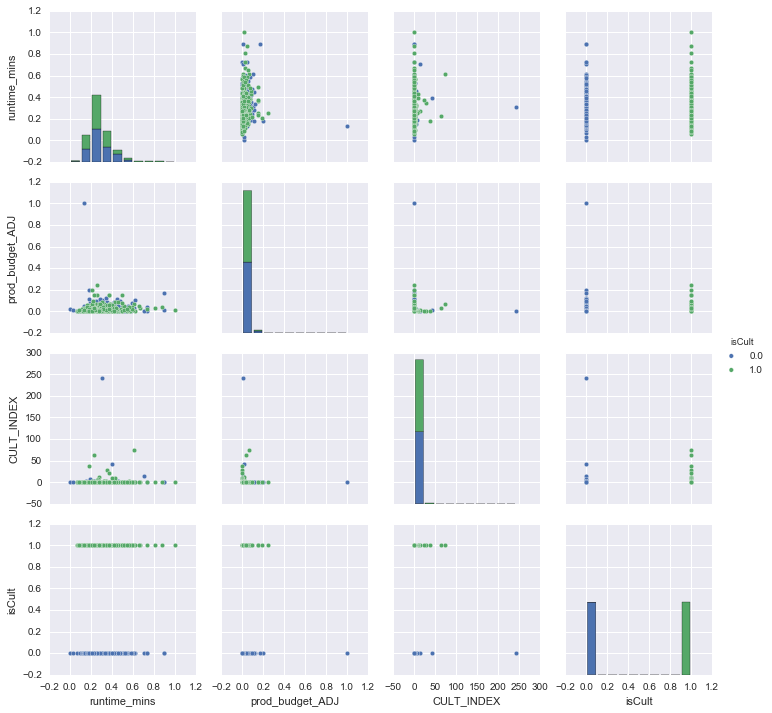

In [67]:
sns.pairplot(num_movsample,dropna=True,hue='isCult')

In [69]:
num_movsample.cov()

,runtime_mins,prod_budget_ADJ,CULT_INDEX,isCult
runtime_mins,0.012627,0.000419,0.043636,-0.000670
prod_budget_ADJ,0.000419,0.001804,-0.003425,-0.000802
CULT_INDEX,0.043636,-0.003425,84.795608,-0.022166
isCult,-0.000670,-0.000802,-0.022166,0.250290


In [70]:
mov.sample(10)

,director,distributor,genre_bomojo,rating,title,releaseDate,isCult,canontitle,num_theaters,leadActor,runtime_mins,releaseYear,rev_opening_ADJ,rev_totalGross_ADJ,prod_budget_ADJ,CULT_INDEX,is_missing_prodbudgetADJ,genre,lifetimeRevenue
4386,Rupert Wainwright,MGM,Horror,R,Stigmata,1999-09-10,0,stigmata,2899,Patricia Arquette,102,1999,31419386.856000,1.473690e+08,4.142857e+07,0.000270,0,Horror,24560467.064852
1874,Mario Van Peebles,Gramercy,Drama,R,Panther,1995-05-05,0,panther,713,Kadeem Hardison,123,1995,4698741.223256,2.721109e+07,3.415304e+06,0.001178,1,Drama,3944989.806344
1928,James Foley,MGM,Unknown,R,Reckless,1984-02-03,0,reckless,897,Aidan Quinn,90,1984,6359641.600000,5.603983e+07,7.033647e+06,0.001064,1,Unknown,6069351.821993
4590,Jared and Jerusha Hess,Paramount,Sports Comedy,PG,Nacho Libre,2006-06-16,0,nacholibre,3070,Jack Black,100,2006,37368670.680000,1.397370e+08,4.131944e+07,0.000280,0,Sports,32175629.400313
1448,Charles Stone III,Miramax,Crime Drama,R,Paid in Full,2002-10-25,0,paidinfull,268,Wood Harris,93,2002,1965691.313793,6.763916e+06,1.322957e+08,0.002420,1,Crime,1275025.858988
2519,Brian De Palma,Warner Bros.,Comedy,R,The Bonfire of the Vanities,1990-12-22,0,bonfireofthevanities,1373,Tom Hanks,126,1990,8612814.414286,6.548351e+07,8.558531e+07,0.000694,0,Comedy,8205830.309910
2837,Michael Lehmann,Sony / Columbia,Comedy,PG,My Giant,1998-04-10,0,mygiant,1948,Billy Crystal,104,1998,5815365.456522,2.808280e+07,3.524711e+06,0.000398,1,Comedy,4509429.920821
3709,George Gallo,Buena Vista,Action Comedy,PG-13,Double Take,2001-01-12,0,doubletake,1631,Eddie Griffin,92,2001,17981590.157143,7.002850e+07,8.789365e+06,0.000431,1,Action,12642712.824307
2035,James Burrows,Paramount,Unknown,R,Partners,1982-04-30,0,partners,877,John Hurt,92,1982,6860452.613793,5.307119e+07,4.192746e+07,0.000915,1,Unknown,5504357.538198
1746,Ken Kwapis,Columbia,Unknown,PG,Vibes,1988-08-05,0,vibes,1003,Cyndi Lauper,99,1988,1917906.234146,8.249815e+06,1.035445e+06,0.000510,1,Unknown,981788.198282


In [77]:
len(mov.genre_bomojo.value_counts())

64